In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chapter I - Data Acuqisition

In [2]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Examine the data quality
Check on the data types, no. of missing values, unique values

In [3]:
train_info_df = pd.DataFrame(train_df.dtypes)
train_info_df['MissingVal'] = train_df.isnull().sum()
train_info_df['NUnique'] = train_df.nunique()
train_info_df['Count'] = train_df.count()
train_info_df = train_info_df.rename(columns = {0: 'DataType'})
train_info_df

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


Alternatively, the above dataset information can be obtained by calling the df.info() function.

In [4]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# Chapter II - Exploratory Analysis

In [5]:
train_df.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Only 38% of the passengers were saved, whereas a majority 61% the passenger did not survive the disaster

## Univariate analysis
7 features as well as the label are shortlisted for analysis. <b>Categorical feature</b>: Pclass, Sex, Embarked; <b>Numerical features</b>: Age, SibSp, Parch, Fare.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


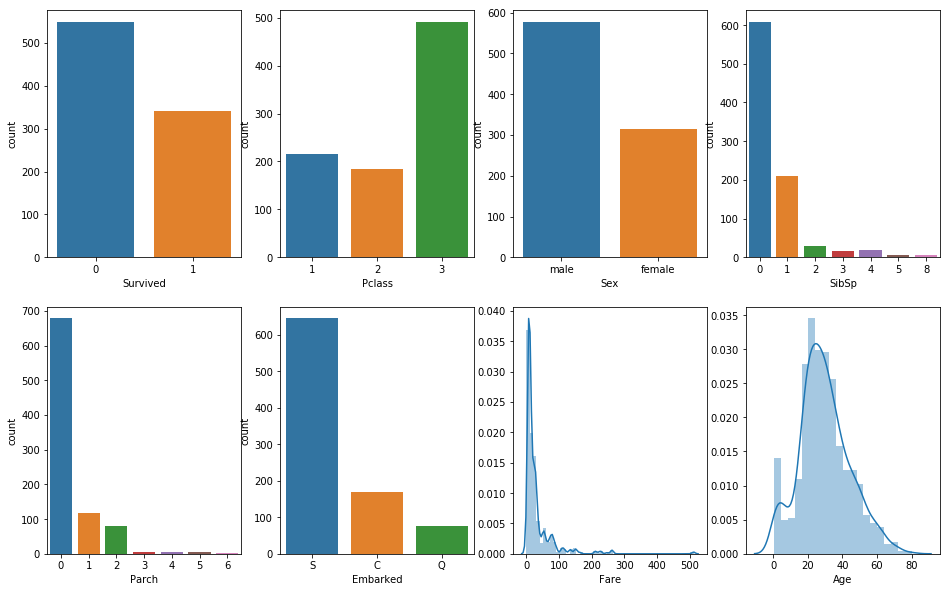

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived', data=train_df, ax=axes[0, 0])
sns.countplot('Pclass', data=train_df, ax=axes[0, 1])
sns.countplot('Sex', data=train_df, ax = axes[0, 2])
sns.countplot('SibSp', data=train_df, ax=axes[0, 3])
sns.countplot('Parch', data=train_df, ax=axes[1, 0])
sns.countplot('Embarked', data=train_df, ax=axes[1,1])
sns.distplot(train_df['Fare'], kde=True, ax=axes[1,2])
sns.distplot(train_df['Age'].dropna(), kde=True, ax=axes[1,3])

## 1. Pclass & sex

Two observations can be summarized from the following graphs.
1. More than half of Class 1 passengers have larger chance of survival. <b>Likelihood of survival: Class 1 > Class 2 > Class 3.</b>
2. Most of the female survived while most male died. Female has a larger chance of survival.

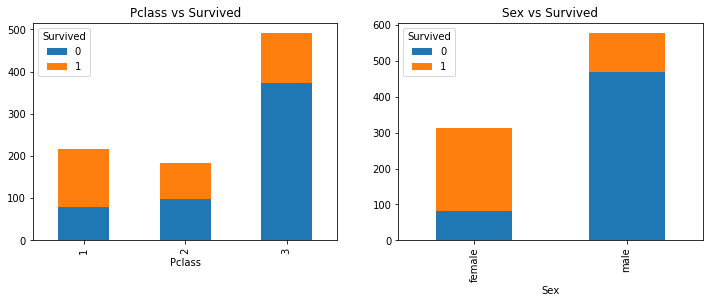

In [7]:
f, ax=plt.subplots(1, 2, figsize=(12,4))
train_df[['Survived', 'Pclass']].pivot_table(index='Pclass', columns='Survived', aggfunc=len).plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Pclass vs Survived')
train_df[['Survived', 'Sex']].pivot_table(index='Sex', columns='Survived', aggfunc=len).plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Sex vs Survived')
plt.show()

The following line chart tells the same story.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


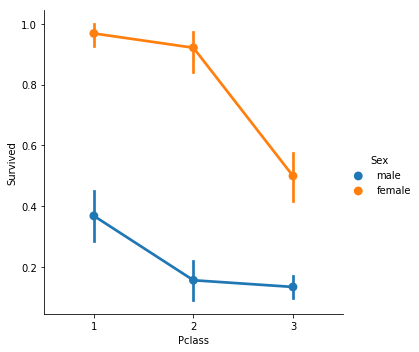

In [8]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_df)

## 2. Age

Observations on Age:<br/>
1. Most of the passengers are between 20-40 years' old.<br/>
2. The number of young children below 10 years' old increases from Class 1 to 3. Children have larger chance of survival in all three classes.<br/>
3. Class 1 passengers below 40 years' old have survival rate of higher than 50%, whereas the Class 2, 3 passengers at young ages have higher death rate.<br/>
4. Among the children below 10, the majority of young boys were saved, while most of the young girls are dead.<br/>
5. Among the passengers in the middle age, female has larger survival rate than male.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


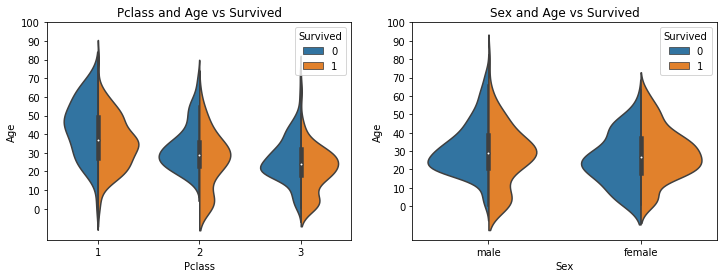

In [9]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train_df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=train_df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## 3. No. of family: siblings/spouses, parents/children

Observation from the following stacked bar charts:
1. Most of the passengers did not have family onboard.<br/>
2. Passengers with 1 sibling/spouse, 1 or 2 parents/children onboard has the largest survival rate.<br/>
3. Passengers with more than 1 siblings, or more than 2 children/parents have low survival rate.

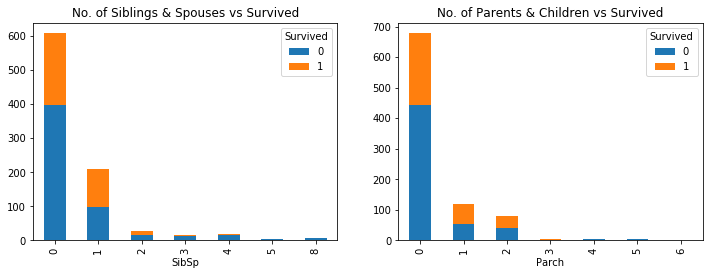

In [10]:
f, ax=plt.subplots(1, 2, figsize=(12,4))
train_df[['Survived', 'SibSp']].pivot_table(index='SibSp', columns='Survived', aggfunc=len).plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('No. of Siblings & Spouses vs Survived')
train_df[['Survived', 'Parch']].pivot_table(index='Parch', columns='Survived', aggfunc=len).plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('No. of Parents & Children vs Survived')
plt.show()

# 4. Fare

It is natural to think that fare is correlated with ticket class. However, the following violin chart shows that
1. The mode of ticket fare of Class 1 > Class 2 > Class 3. Note that the passengers who pay more than 200 are filtered to yield a more explicit visualization effect.<br/>
2. Over all the three classes, <b>passengers who pay a higher fare has better chance of survival</b>.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


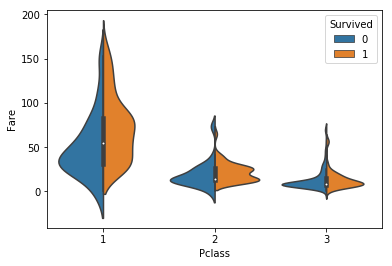

In [11]:
low_fare_train_df = train_df[train_df['Fare'] <= 200]
sns.violinplot('Pclass', 'Fare', hue='Survived', data=low_fare_train_df, split=True)

## 5. Embarked

Titanic set sail for Southampton, and then headed to Cherbourg and Queenstown, i.e. Southampton --> Cherbourg --> Queenstown.
<img src="input/Titanic_voyage_map.png" alt="Titanic voyage map">
Passengers who boarded from C = Cherbourg, Q = Queenstown, S = Southampton have different survival rate. This might be correlated with ticket class. The following bar charts show that
<ol>
    <li>No. of passengers who boarded at Port S > Port C > Port Q.</li>
    <li>More than half of the passengers who boarded at Port C are saved.</li>
    <li>Around half of the passengers who boarded at Port C are Class 1 passengers.</li>
</ol>

Text(0.5,1,'Class distribution of passengers boarded at port S')

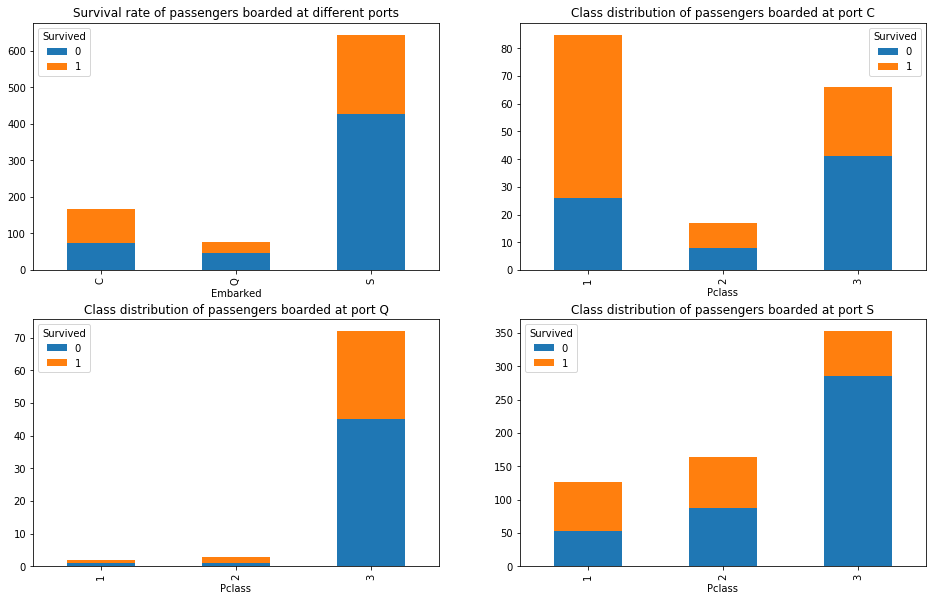

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
train_df[['Survived', 'Embarked']].pivot_table(index='Embarked',
                                               columns='Survived',
                                               aggfunc=len).plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Survival rate of passengers boarded at different ports')
portC_train_df = train_df[train_df['Embarked'] == 'C']
portC_train_df[['Survived', 'Pclass']].pivot_table(index='Pclass',
                                                   columns='Survived',
                                                   aggfunc=len).plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Class distribution of passengers boarded at port C')
portQ_train_df = train_df[train_df['Embarked'] == 'Q']
portQ_train_df[['Survived', 'Pclass']].pivot_table(index='Pclass',
                                                   columns='Survived',
                                                   aggfunc=len).plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Class distribution of passengers boarded at port Q')
portS_train_df = train_df[train_df['Embarked'] == 'S']
portS_train_df[['Survived', 'Pclass']].pivot_table(index='Pclass',
                                                   columns='Survived',
                                                   aggfunc=len).plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Class distribution of passengers boarded at port S')

# 6. Cabin

In [22]:
cabin_only = train_df[["Cabin"]].copy()
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
cabin_only[cabin_only["Cabin_Data"]]

,Cabin,Cabin_Data,Deck,Room
1,C85,True,C,85.0
3,C123,True,C,123.0
6,E46,True,E,46.0
10,G6,True,G,6.0
11,C103,True,C,103.0
21,D56,True,D,56.0
23,A6,True,A,6.0
27,C23 C25 C27,True,C,23.0
31,B78,True,B,78.0
52,D33,True,D,33.0


# Chapter III - Feature Engineering

## 1. No. of family: combining SibSp and Parch

<i>'SibSp'</i> and <i>'Parch'</i> have similar impact to the chance of survival. Hence, A new feature <i>'FamilySize'</i> can be created by summing up <i>'SibSp'</i> and <i>'Parch'</i>.<br/><b>More than half of the passengers whose size of family is between 2 to 4 survived.</b>

In [13]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
family_size_freq = train_df['FamilySize'].value_counts().to_frame(name='Frequency')
family_size_freq = family_size_freq.reset_index()
family_size_rank = train_df[['FamilySize',
                             'Survived']].groupby(['FamilySize'], 
                                                  as_index=False).mean().sort_values(by='Survived', ascending=False)
family_size_rank.merge(family_size_freq, left_on='FamilySize', right_on='index').drop('index', axis=1)

,FamilySize,Survived,Frequency
0,4,0.724138,29
1,3,0.578431,102
2,2,0.552795,161
3,7,0.333333,12
4,1,0.303538,537
5,5,0.200000,15
6,6,0.136364,22
7,8,0.000000,6
8,11,0.000000,7


## 2. Passenger title
<ol>
    <li>Identify frequently appearing titles from passengers' name: 'Mrs', 'Miss', 'Master', 'Mr'. The rest of the titles would be normalized.</li>
    <li>Female passengers with title 'Mrs' have an 80% chance of survival. 'Mrs' indicates married lady and mother.</li>
</ol>

In [14]:
def extract_title(full_name):
    names = full_name.split(' ')
    for name in names:
        if name[-1] == '.':
            return name[:-1]
    return ''

In [15]:
train_df['Title'] = train_df['Name'].apply(extract_title)
title_freq = train_df['Title'].value_counts().to_frame(name='Frequency')
title_freq = title_freq.reset_index()
title_rank = train_df[['Title',
                       'Survived']].groupby(['Title'],
                                            as_index=False).mean().sort_values(by='Survived', ascending=False)
title_rank.merge(title_freq, left_on='Title', right_on='index').drop('index', axis=1)

,Title,Survived,Frequency
0,Sir,1.000000,1
1,Countess,1.000000,1
2,Ms,1.000000,1
3,Mme,1.000000,1
4,Lady,1.000000,1
5,Mlle,1.000000,2
6,Mrs,0.792000,125
7,Miss,0.697802,182
8,Master,0.575000,40
9,Col,0.500000,2


# 3. Cabin

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


# References
Exploratory Data Analysis on the Titanic Dataset by Asela<br/>
https://www.kaggle.com/aselad/exploratory-data-analysis-on-the-titanic-dataset

5 Ways To Handle Missing Values In Machine Learning Datasets<br/>
https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/

Finding Important Factors To Survive Titanic<br/>
https://www.kaggle.com/jatturat/finding-important-factors-to-survive-titanic

Analyzing Titanic Dataset<br/>
https://www.kaggle.com/viveksrinivasan/analyzing-titanic-dataset

Titanic Cabin Features<br/>
https://www.kaggle.com/ccastleberry/titanic-cabin-features

Benchmark accuracy: 0.8